<a href="https://colab.research.google.com/github/waldirborbajr/data-science/blob/main/owid/OWID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COVID-19 dataset by Our World in Data**

Our World in Data, have been collecting COVID-19 data from various domains since the pandemic started.

* Source: https://docs.owid.io/projects/covid/en/latest/
* CSV: https://github.com/owid

In [ ]:
# supress warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# install scikit-plot
!pip install -q scikit-plot

In [ ]:
# import packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scikitplot as skplt

## Importing data
All data used during analisys can be dowloaded [here](https://github.com/owid/covid-19-data/tree/master/public/data/latest). Basically it is a CSV file that contains 237 rows and 67 columns.

In [43]:
# importing dataframe
file = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/latest/owid-covid-latest.csv"
df = pd.read_csv(file,parse_dates=['last_updated_date'])

In [44]:
# dataframe dimension
print("Rows:\t\t{}".format(df.shape[0]))
print("Columns:\t{}".format(df.shape[1]))

Rows:		237
Columns:	67


In [45]:
# dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    237 non-null    object        
 1   continent                                   224 non-null    object        
 2   location                                    237 non-null    object        
 3   last_updated_date                           237 non-null    datetime64[ns]
 4   total_cases                                 231 non-null    float64       
 5   new_cases                                   231 non-null    float64       
 6   new_cases_smoothed                          231 non-null    float64       
 7   total_deaths                                227 non-null    float64       
 8   new_deaths                                  227 non-null    float64       
 9   new_deaths

In [46]:
# first 5 rows of dataframe
df.head()

,iso_code,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2022-11-27,205612.0,0.0,66.571,7833.0,0.0,0.286,...,NaN,37.746,0.50,64.83,0.511,4.112877e+07,NaN,NaN,NaN,NaN
1,OWID_AFR,NaN,Africa,2022-11-27,12419264.0,619.0,1647.429,257299.0,0.0,26.143,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
2,ALB,Europe,Albania,2022-11-27,333330.0,8.0,10.571,3594.0,0.0,0.000,...,51.2,NaN,2.89,78.57,0.795,2.842318e+06,NaN,NaN,NaN,NaN
3,DZA,Africa,Algeria,2022-11-27,271061.0,0.0,5.429,6881.0,0.0,0.000,...,30.4,83.741,1.90,76.88,0.748,4.490323e+07,NaN,NaN,NaN,NaN
4,AND,Europe,Andorra,2022-11-27,46824.0,0.0,0.000,156.0,0.0,0.000,...,37.8,NaN,NaN,83.73,0.868,7.984300e+04,NaN,NaN,NaN,NaN


In [47]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.310000e+02,231.000000,231.000000,2.270000e+02,227.000000,227.000000,230.000000,230.000000,230.000000,226.000000,...,145.000000,95.000000,172.000000,218.000000,189.000000,2.360000e+02,0.0,0.0,0.0,0.0
mean,1.187304e+07,8251.069264,9236.941853,1.220105e+05,19.810573,27.144141,180917.612491,323.813183,139.006148,1231.948407,...,32.909897,50.270832,3.071994,73.393440,0.722540,1.371961e+08,NaN,NaN,NaN,NaN
std,5.652825e+07,39004.104524,48488.566352,5.583427e+05,73.316469,135.906895,184048.303497,1240.891105,702.354235,1275.564400,...,13.621757,31.889658,2.541906,7.482858,0.149793,6.832300e+08,NaN,NaN,NaN,NaN
min,1.000000e+00,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.038000,0.000000,0.000000,0.230000,...,7.700000,1.188000,0.100000,53.280000,0.394000,8.080000e+02,NaN,NaN,NaN,NaN
25%,3.197600e+04,0.000000,0.000000,2.965000e+02,0.000000,0.000000,16019.139000,0.000000,0.000000,157.086250,...,22.600000,20.105000,1.300000,68.532500,0.602000,8.297690e+05,NaN,NaN,NaN,NaN
50%,2.722080e+05,1.000000,16.857000,3.163000e+03,0.000000,0.000000,121339.756000,0.048000,3.345000,778.402500,...,33.100000,49.542000,2.450000,74.705000,0.740000,6.909971e+06,NaN,NaN,NaN,NaN
75%,2.065311e+06,473.000000,452.857500,2.033850e+04,0.000000,2.357000,293836.727500,41.382500,61.956250,1995.883750,...,41.300000,81.568500,4.050000,78.875000,0.829000,3.353106e+07,NaN,NaN,NaN,NaN
max,6.414652e+08,386918.000000,502674.714000,6.630593e+06,580.000000,1430.000000,685527.010000,10122.449000,10195.980000,6383.425000,...,78.100000,98.999000,13.800000,86.750000,0.957000,7.975105e+09,NaN,NaN,NaN,NaN


In [48]:
df.isnull().sum().max()

237

In [49]:
# fill null with zeros
df.replace('NaN', np.nan)
df.fillna(0)

,iso_code,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2022-11-27,205612.0,0.0,66.571,7833.0,0.0,0.286,...,0.000,37.746,0.500,64.83,0.511,4.112877e+07,0.0,0.0,0.0,0.0
1,OWID_AFR,0,Africa,2022-11-27,12419264.0,619.0,1647.429,257299.0,0.0,26.143,...,0.000,0.000,0.000,0.00,0.000,1.426737e+09,0.0,0.0,0.0,0.0
2,ALB,Europe,Albania,2022-11-27,333330.0,8.0,10.571,3594.0,0.0,0.000,...,51.200,0.000,2.890,78.57,0.795,2.842318e+06,0.0,0.0,0.0,0.0
3,DZA,Africa,Algeria,2022-11-27,271061.0,0.0,5.429,6881.0,0.0,0.000,...,30.400,83.741,1.900,76.88,0.748,4.490323e+07,0.0,0.0,0.0,0.0
4,AND,Europe,Andorra,2022-11-27,46824.0,0.0,0.000,156.0,0.0,0.000,...,37.800,0.000,0.000,83.73,0.868,7.984300e+04,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,WLF,Oceania,Wallis and Futuna,2022-11-27,3415.0,0.0,0.000,7.0,0.0,0.000,...,0.000,0.000,0.000,79.94,0.000,1.159600e+04,0.0,0.0,0.0,0.0
233,OWID_WRL,0,World,2022-11-27,641465174.0,251452.0,502674.714,6630593.0,504.0,1430.000,...,34.635,60.130,2.705,72.58,0.737,7.975105e+09,0.0,0.0,0.0,0.0
234,YEM,Asia,Yemen,2022-11-27,11945.0,0.0,0.000,2159.0,0.0,0.000,...,29.200,49.542,0.700,66.12,0.470,3.369661e+07,0.0,0.0,0.0,0.0
235,ZMB,Africa,Zambia,2022-11-27,333721.0,0.0,5.143,4019.0,0.0,0.286,...,24.700,13.938,2.000,63.89,0.584,2.001767e+07,0.0,0.0,0.0,0.0


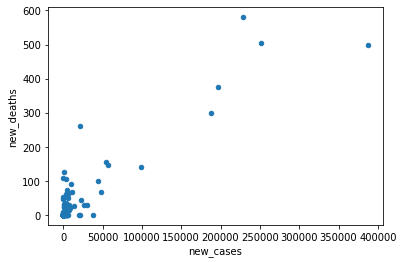

In [50]:
df.plot.scatter('new_cases','new_deaths')